In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('dataset_final_treat.csv')
dataset.head()

,stimul,3_seconds_before,max_variation_3_init,size_instantly_before_stimul,size_instantly_after_stimul,max_variation_end_3,3_seconds_after,max_variation_3_5,5_seconds_after,max_variation_5_6,6_seconds_after,max_variation_6_10,10_seconds_after,max_variation_10_15,15_seconds_after,classify
0,GREEN,NaN,75.499630,148.101109,86.564969,85.859824,77.413905,16.322670,79.548213,5.807754,75.612416,94.557429,NaN,36.423620,NaN,Alterado
1,WHITE,71.064351,16.322670,75.921845,40.385230,53.387231,58.089947,15.525845,63.182150,13.951668,74.125900,36.922826,90.458893,56.981451,NaN,Alterado
2,RED,91.930873,9.385295,92.801719,49.058049,35.653703,79.085347,7.341944,78.327185,30.556769,70.664204,83.370715,96.944942,126.174200,170.131519,Alterado
3,BLUE,103.827673,114.258446,135.622956,52.562305,77.406563,69.620100,18.853719,83.177519,3.867221,85.642825,68.658118,NaN,63.930862,NaN,Alterado
4,GREEN,73.363492,21.154029,86.163943,72.408206,60.984162,68.086146,22.232613,75.391691,43.118221,NaN,48.833691,NaN,7.567916,NaN,Alterado


In [3]:
dataset = dataset.fillna(0)

In [4]:
# columns_drop = ['3_seconds_after', '15_seconds_after', 'max_value3', 'stimul', '3_seconds_before'] # Accuracy: 0.8539 (+/- 0.1527)
# columns_drop = ['min_value1','min_value2','min_value3','max_value1','max_value2','max_value3']
columns_drop = []

if len(columns_drop) > 0:
    dataset = dataset.drop(columns_drop, axis=1)

In [5]:
if 'stimul' in dataset.columns:
    mask = dataset.stimul.duplicated()
    print(dataset.stimul[~mask])
    new_stimuls = {'GREEN': 0, 'WHITE': 1, 'RED': 2, 'BLUE': 3}
    
    for index, item in dataset.iterrows():
        dataset['stimul'][index] = new_stimuls[item.stimul]

0    GREEN
1    WHITE
2      RED
3     BLUE
Name: stimul, dtype: object


C:\Users\marco\anaconda3\envs\Classify\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [6]:
if 'classify' in dataset.columns and False:
    mask = dataset.classify.duplicated()
    print(dataset.classify[~mask])
    new_classify = {'Alterado': 0, 'Atermo': 1}

    for index, item in dataset.iterrows():
        dataset['classify'][index] = new_classify[item.classify]

In [7]:
dataset.head()

,stimul,3_seconds_before,max_variation_3_init,size_instantly_before_stimul,size_instantly_after_stimul,max_variation_end_3,3_seconds_after,max_variation_3_5,5_seconds_after,max_variation_5_6,6_seconds_after,max_variation_6_10,10_seconds_after,max_variation_10_15,15_seconds_after,classify
0,0,0.000000,75.499630,148.101109,86.564969,85.859824,77.413905,16.322670,79.548213,5.807754,75.612416,94.557429,0.000000,36.423620,0.000000,Alterado
1,1,71.064351,16.322670,75.921845,40.385230,53.387231,58.089947,15.525845,63.182150,13.951668,74.125900,36.922826,90.458893,56.981451,0.000000,Alterado
2,2,91.930873,9.385295,92.801719,49.058049,35.653703,79.085347,7.341944,78.327185,30.556769,70.664204,83.370715,96.944942,126.174200,170.131519,Alterado
3,3,103.827673,114.258446,135.622956,52.562305,77.406563,69.620100,18.853719,83.177519,3.867221,85.642825,68.658118,0.000000,63.930862,0.000000,Alterado
4,0,73.363492,21.154029,86.163943,72.408206,60.984162,68.086146,22.232613,75.391691,43.118221,0.000000,48.833691,0.000000,7.567916,0.000000,Alterado


In [8]:
dataset.describe()

,3_seconds_before,max_variation_3_init,size_instantly_before_stimul,size_instantly_after_stimul,max_variation_end_3,3_seconds_after,max_variation_3_5,5_seconds_after,max_variation_5_6,6_seconds_after,max_variation_6_10,10_seconds_after,max_variation_10_15,15_seconds_after
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,118.821901,31.037054,124.960433,90.711102,70.057877,105.523616,23.830578,109.864794,13.634601,112.187535,41.838258,81.464643,46.180707,74.236243
std,42.384492,37.720835,31.803185,26.390809,49.259426,29.309791,34.716021,27.925399,23.401062,34.025721,44.205538,62.311502,44.407678,69.358462
min,0.000000,3.628557,51.237884,40.385230,11.164034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.969060,9.974571,109.070395,75.221179,35.041995,89.885799,8.260195,92.878557,4.302281,97.559732,12.883035,0.000000,14.303464,0.000000
50%,123.432660,16.480476,125.342123,89.145870,52.088392,107.674217,11.875426,112.184351,6.078890,115.074324,19.901738,103.510764,30.950279,99.242261
75%,145.769542,30.023472,144.463437,105.143600,86.450575,120.969812,19.335126,127.494118,11.996472,132.465935,54.063886,132.645194,58.255405,135.052850
max,198.625560,171.131439,212.018445,198.998635,210.591237,216.592460,162.102239,167.229959,181.699918,229.103781,183.868677,196.143232,202.865722,196.595873


In [9]:
dataset.groupby('classify').size()

classify
Alterado     65
Atermo      106
dtype: int64

In [10]:
aux = dataset.copy()
aux.pop('classify')
X = aux.values
y = dataset['classify'].values

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

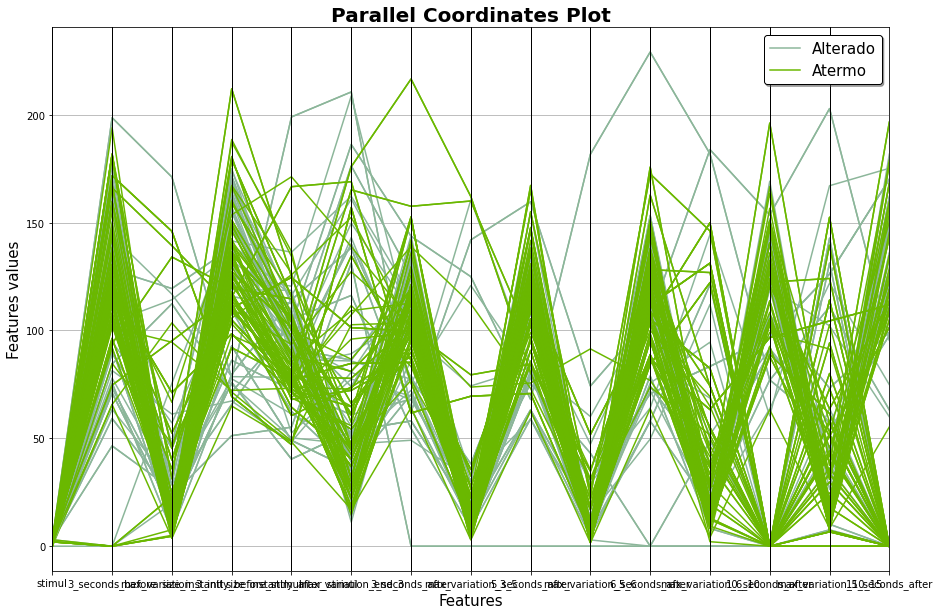

In [14]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(15,10))
parallel_coordinates(dataset, "classify")

plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

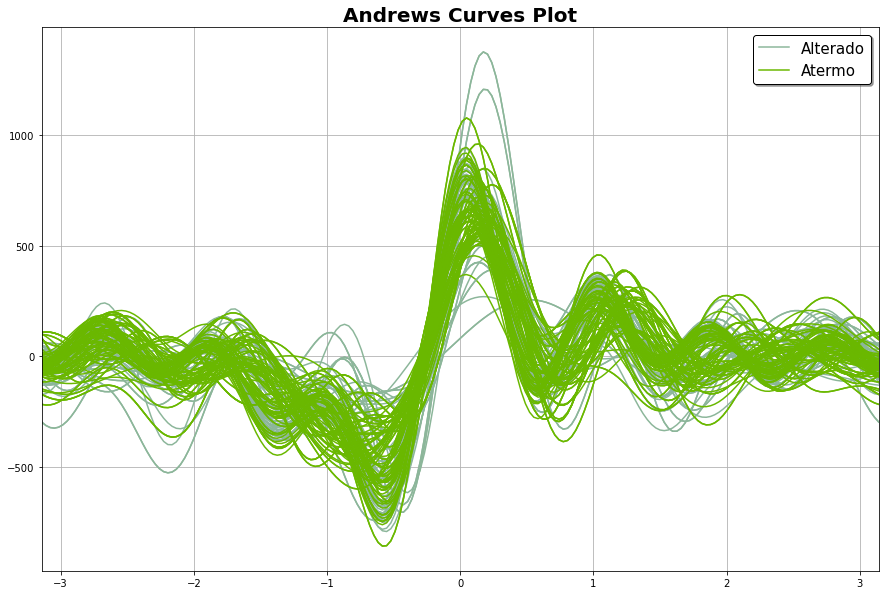

In [15]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(dataset, "classify")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

C:\Users\marco\anaconda3\envs\Classify\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

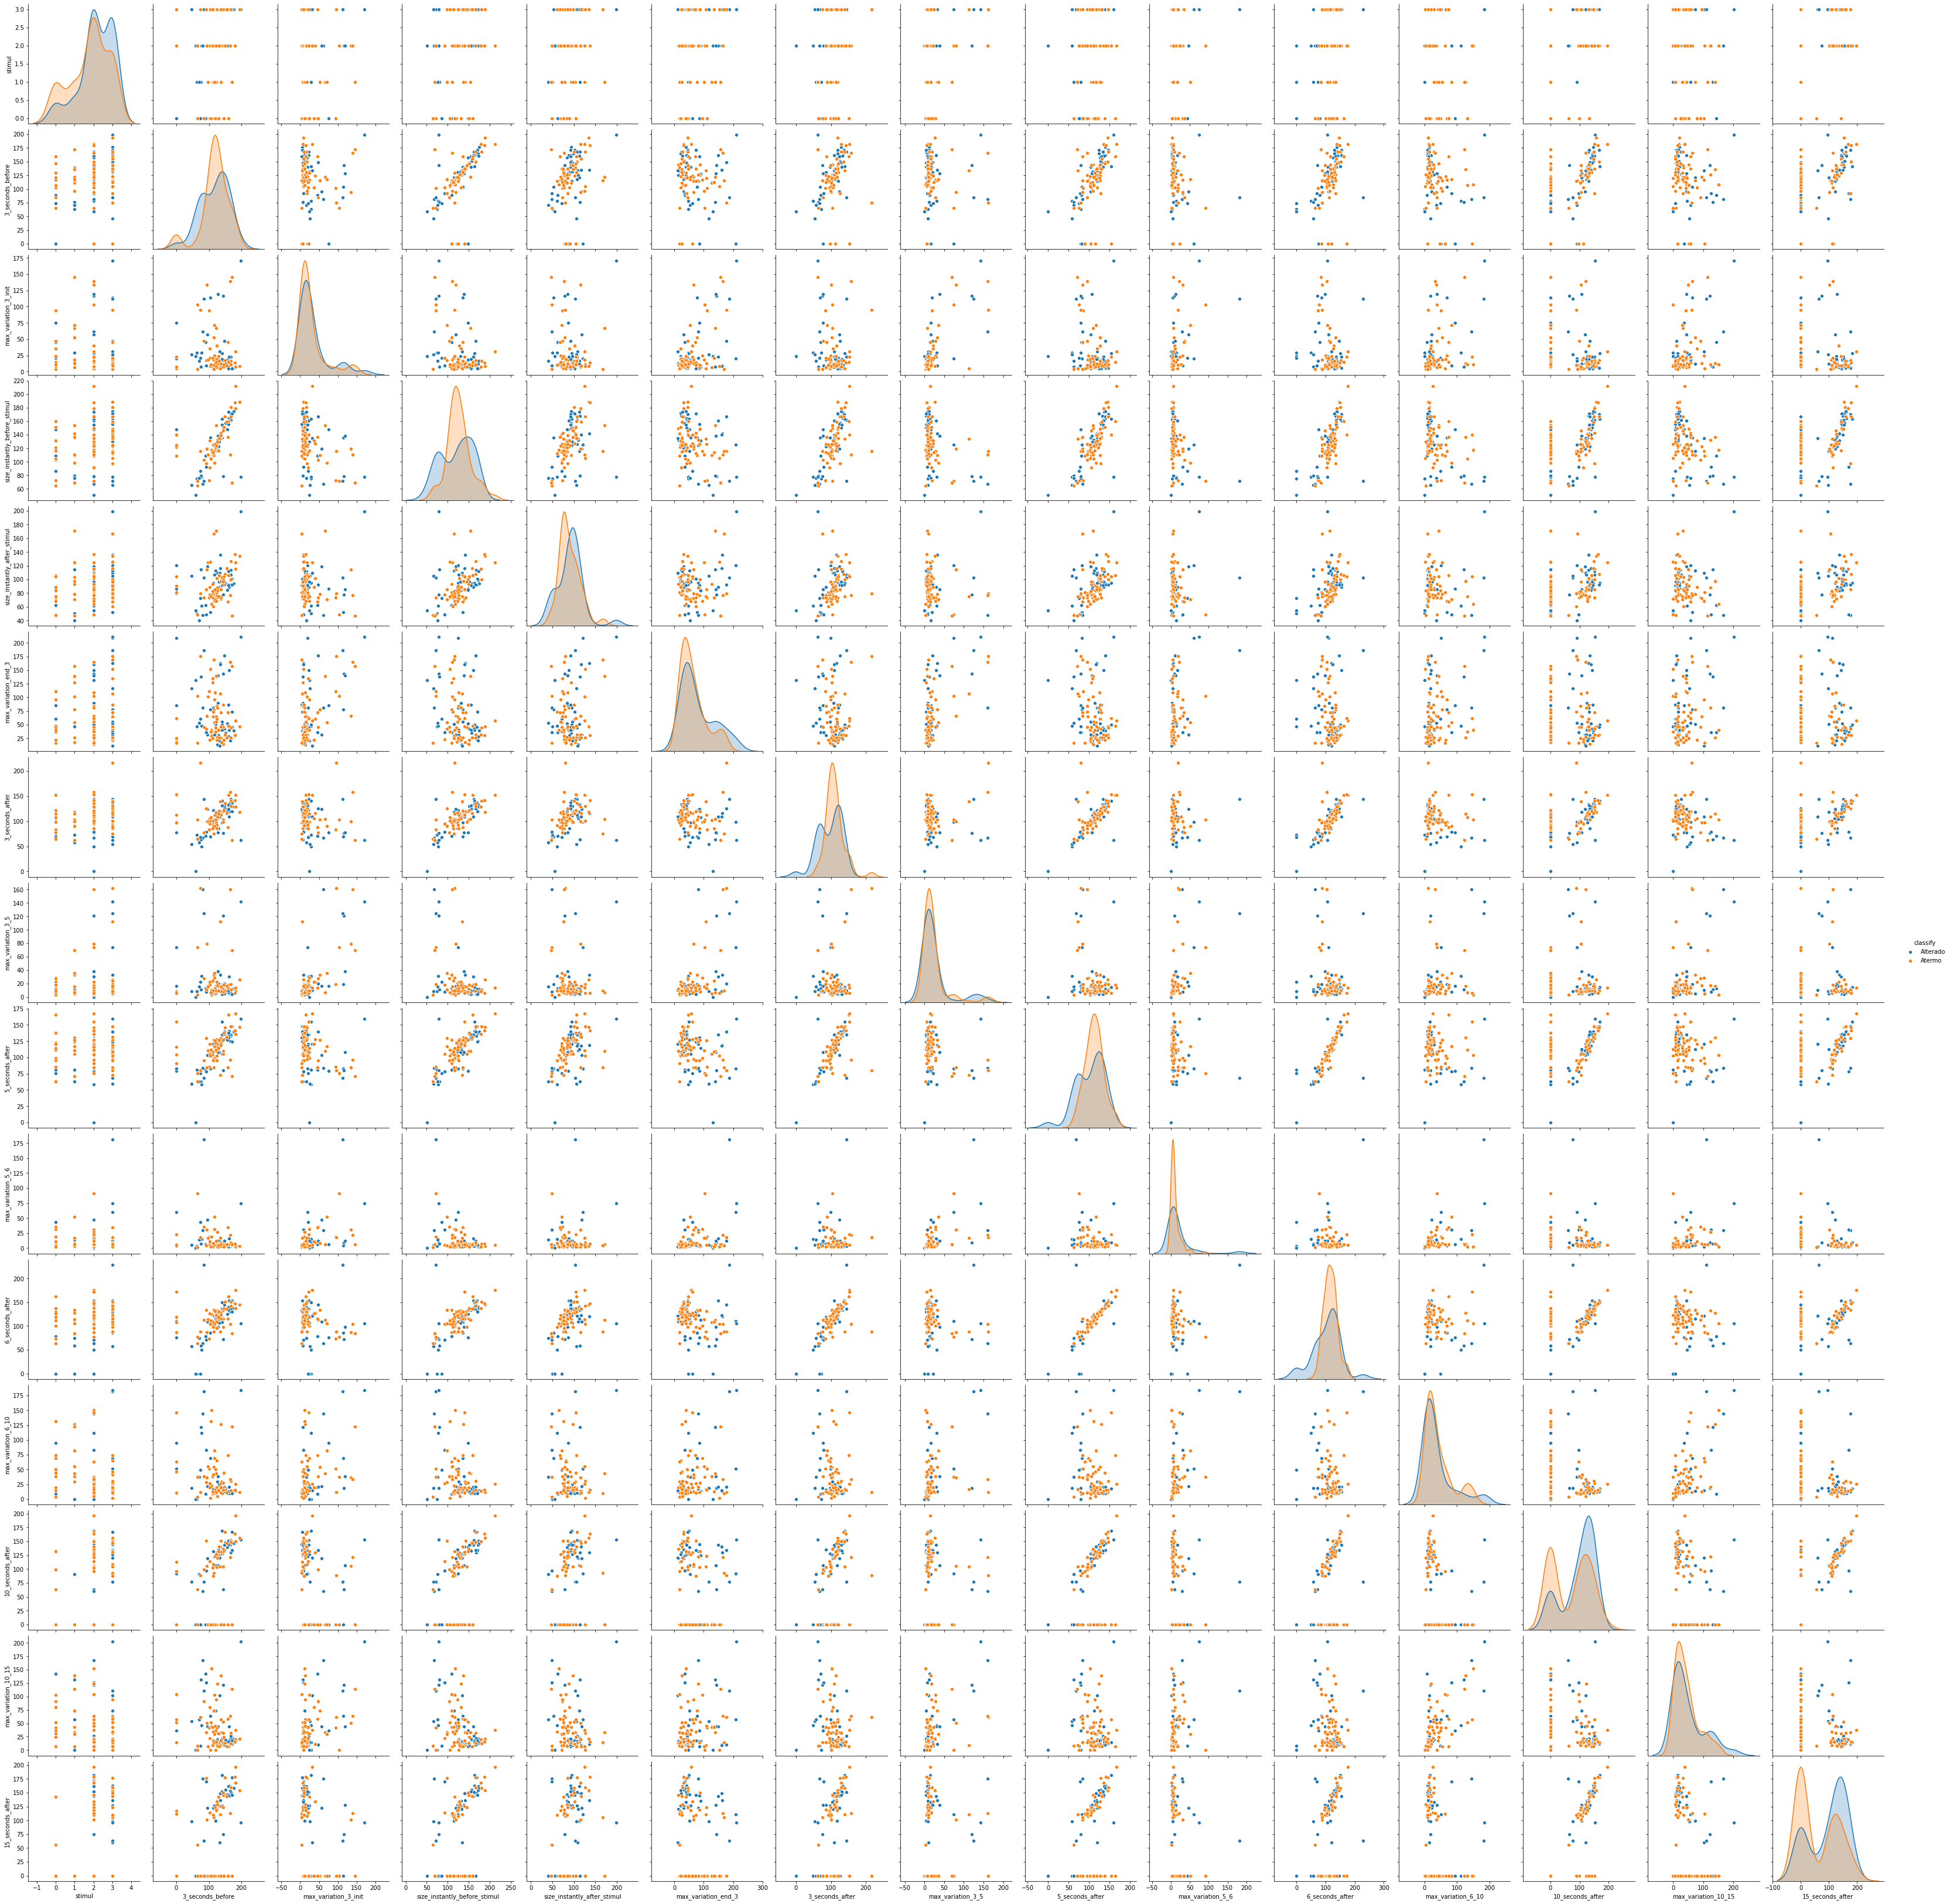

In [16]:
plt.figure()
# sns.pairplot(dataset, hue = "classify", size=3, markers=["o", "s", "D"])
sns.pairplot(dataset, hue = "classify", size=3)
plt.show()

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [18]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 8,  8],
       [ 2, 17]], dtype=int64)

In [19]:
accuracy = accuracy_score(y_test, y_pred) * 100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 71.43 %.


In [20]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

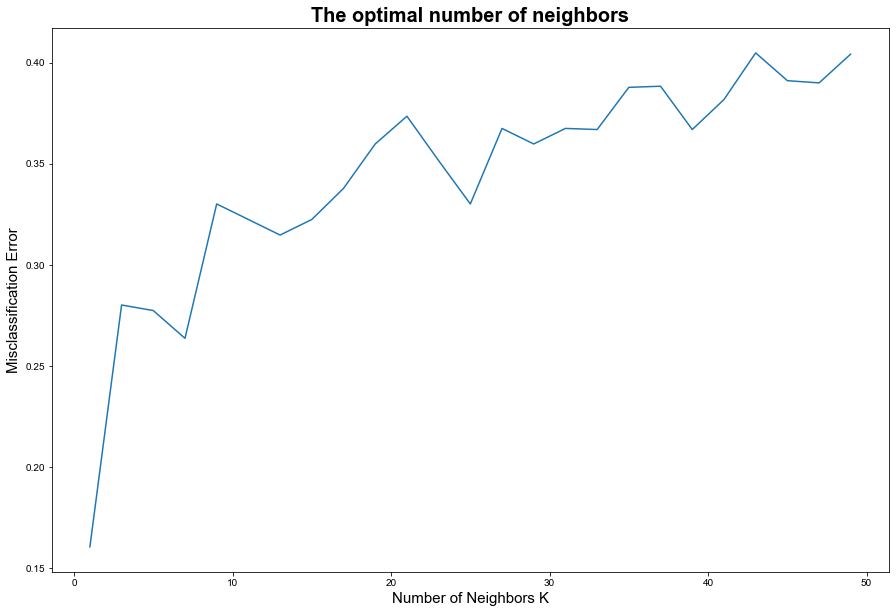

In [21]:
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [22]:
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 1.


In [23]:
import numpy as np
import pandas as pd
import scipy as sp

class MyKNeighborsClassifier():
    """
    My implementation of KNN algorithm.
    """
    
    def __init__(self, n_neighbors=5):
        self.n_neighbors=n_neighbors
        
    def fit(self, X, y):
        """
        Fit the model using X as array of features and y as array of labels.
        """
        n_samples = X.shape[0]
        # number of neighbors can't be larger then number of samples
        if self.n_neighbors > n_samples:
            raise ValueError("Number of neighbors can't be larger then number of samples in training set.")
        
        # X and y need to have the same number of samples
        if X.shape[0] != y.shape[0]:
            raise ValueError("Number of samples in X and y need to be equal.")
        
        # finding and saving all possible class labels
        self.classes_ = np.unique(y)
        
        self.X = X
        self.y = y
        
    def predict(self, X_test):
        
        # number of predictions to make and number of features inside single sample
        n_predictions, n_features = X_test.shape
        
        # allocationg space for array of predictions
        predictions = np.empty(n_predictions, dtype=int)
        
        # loop over all observations
        for i in range(n_predictions):
            # calculation of single prediction
            predictions[i] = single_prediction(self.X, self.y, X_test[i, :], self.n_neighbors)

        return(predictions)

In [24]:
def single_prediction(X, y, x_train, k):
    
    # number of samples inside training set
    n_samples = X.shape[0]
    
    # create array for distances and targets
    distances = np.empty(n_samples, dtype=np.float64)

    # distance calculation
    for i in range(n_samples):
        distances[i] = (x_train - X[i]).dot(x_train - X[i])
    
    # combining arrays as columns
    distances = sp.c_[distances, y]
    # sorting array by value of first column
    sorted_distances = distances[distances[:,0].argsort()]
    # celecting labels associeted with k smallest distances
    targets = sorted_distances[0:k,1]

    unique, counts = np.unique(targets, return_counts=True)
    return(unique[np.argmax(counts)])

In [25]:
# Instantiate learning model (k = 3)
my_classifier = MyKNeighborsClassifier(n_neighbors=3)

# Fitting the model
my_classifier.fit(X_train, y_train)

# Predicting the Test set results
my_y_pred = my_classifier.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test, my_y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 71.43 %.
